## Bitcoin Price Prediction using Twitter Sentimennt Analysis
### ML Project (Semester 6)
- Pawan Khandelwal  [19ucc004]


In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bitcoin-price-history/BTC-USD.csv
/kaggle/input/bitcoin-tweets/Bitcoin_tweets.csv


In [2]:
! pip install vaderSentiment

     |████████████████████████████████| 125 kB 891 kB/s            


In [3]:
from time import sleep
import json
import pandas as pd
import io
import re
import numpy as np
from tqdm import tqdm
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

from sklearn import preprocessing
import matplotlib.pyplot as plt

In [4]:
tweets_raw_file   = '/kaggle/input/bitcoin-tweets/Bitcoin_tweets.csv'
tweets_clean_file = './Bitcoin_tweets_clean.csv'
bitcoin_price_file = '/kaggle/input/bitcoin-price-history/BTC-USD.csv'

In [5]:
df_raw = pd.read_csv(tweets_raw_file,lineterminator='\n',low_memory=False)

In [6]:
print(df_raw.shape)
df_raw.head(5)

(3318936, 13)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


In [7]:
# clean dataframe
df_raw = df_raw.sort_values(by = 'date')
dd = df_raw.sample(frac=0.01, replace=False, random_state=1)
dd.reset_index(inplace=True)
for i,s in enumerate(tqdm(dd['text'],position=0, leave=True)):
    text = str(dd.loc[i, 'text'])
    #Remove hashtags
    text = text.replace("#", "")
    #Remove Hyperlinks
    text = re.sub('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', '', text, flags=re.MULTILINE)
    #Remove Usernames and Replies
    text = re.sub('@\\w+ *', '', text, flags=re.MULTILINE)
    dd.loc[i, 'text'] = text
dd.to_csv(tweets_clean_file, header=True, encoding='utf-8',index=False)

100%|██████████| 33189/33189 [01:33<00:00, 354.99it/s]


In [8]:
df_clean = pd.read_csv(tweets_clean_file)

In [9]:
print(df_clean.shape)
df_clean.head(5)

(33191, 14)


,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,2989762,Viktor Trokhymenko,NaN,I am from Ukraine interested in different dire...,2021-09-10 13:28:14,94.0,270.0,141.0,False,2022-04-19 18:36:25,"Check it out who followed to in Twitter!\n\n, ...","['BTC', 'crypto']",Twitter Web App,False
1,2441888,Crypto dog,NaN,"Market analysis & recaps, scalping leverage ca...",2021-12-20 06:16:13,139.0,221.0,53.0,False,2022-03-19 16:42:19,the strongest bullish signal flashed for Bitco...,"['Bitcoin', 'BTC', 'Cryptocurrency']",Twitter for Android,False
2,835342,Bitcoin,NaN,#bitcoin,2021-03-24 17:33:57,119.0,0.0,0.0,False,2021-08-06 04:03:53,"The current price of bitcoin is $40,149.00. It...","['bitcoin', 'btc', 'cryptocurrency']",Bitcoin Observer,False
3,1245465,Crypto Mentor,NOT FINANCIAL ADVICE,#Bitcoin (Free Crypto Signals🚀)\n14fsw2pR4u942...,2021-02-17 10:28:09,578.0,443.0,1957.0,False,2021-10-19 19:08:53,"Bitcoin going to $64,000 🚀",['Bitcoin'],Twitter for Android,False
4,2377391,AdamLiu,NaN,Crypto Asset Trend Professional Analyst，Early ...,2021-11-24 18:07:05,17714.0,53.0,840.0,False,2022-03-10 03:42:46,bitcoinnews 's short-term decline gives us a c...,"['bitcoinnews', 'BTC', 'BTCUSD', 'bitcon', 'Cr...",Twitter Web App,False


In [10]:
analyzer = SentimentIntensityAnalyzer()
compound = []
for i,s in enumerate(tqdm(df_clean['text'],position=0, leave=True)):
    vs = analyzer.polarity_scores(str(s))
    compound.append(vs["compound"])
df_clean["compound"] = compound
df_clean.head(2)

100%|██████████| 33191/33191 [00:06<00:00, 4863.66it/s]


,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,compound
0,2989762,Viktor Trokhymenko,NaN,I am from Ukraine interested in different dire...,2021-09-10 13:28:14,94.0,270.0,141.0,False,2022-04-19 18:36:25,"Check it out who followed to in Twitter!\n\n, ...","['BTC', 'crypto']",Twitter Web App,False,-0.5067
1,2441888,Crypto dog,NaN,"Market analysis & recaps, scalping leverage ca...",2021-12-20 06:16:13,139.0,221.0,53.0,False,2022-03-19 16:42:19,the strongest bullish signal flashed for Bitco...,"['Bitcoin', 'BTC', 'Cryptocurrency']",Twitter for Android,False,0.9215


## Calculate a score for each tweet
To calculate the score for each tweet, we use different variables to which we had a weight based on its importance.

The compound column represents the sentiment of the tweets and its value is between -1 and 1.

We also use the number of retweets, the number of likes, and the number of users that follow the tweet's author.

In [11]:
scores = []
for i, s in tqdm(df_clean.iterrows(), total=df_clean.shape[0],position=0, leave=True):
    try:
        scores.append(s["compound"] * ((int(s["user_followers"]))) * ((int(s["user_favourites"])+1)/int(s['user_followers']+1)) *((int(s["is_retweet"])+1)))
    except:
        scores.append(np.nan)
df_clean["score"] = scores
df_clean.head(2)

100%|██████████| 33191/33191 [00:02<00:00, 13173.77it/s]


,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,compound,score
0,2989762,Viktor Trokhymenko,NaN,I am from Ukraine interested in different dire...,2021-09-10 13:28:14,94.0,270.0,141.0,False,2022-04-19 18:36:25,"Check it out who followed to in Twitter!\n\n, ...","['BTC', 'crypto']",Twitter Web App,False,-0.5067,-71.194017
1,2441888,Crypto dog,NaN,"Market analysis & recaps, scalping leverage ca...",2021-12-20 06:16:13,139.0,221.0,53.0,False,2022-03-19 16:42:19,the strongest bullish signal flashed for Bitco...,"['Bitcoin', 'BTC', 'Cryptocurrency']",Twitter for Android,False,0.9215,49.405564


## read Bitcoin price 

In [12]:
df_price = pd.read_csv(bitcoin_price_file)
df_price.Date = pd.to_datetime(df_price.Date)
df_price.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200


In [13]:
df_clean = df_clean.drop_duplicates()
tweets = df_clean.copy()
tweets['date'] = pd.to_datetime(tweets['date'],utc=True)
tweets.date = tweets.date.dt.tz_localize(None)
tweets.index = tweets['date']
tweets_grouped = tweets.resample('1h').sum()

crypto_usd = df_price.copy()
crypto_usd['Date'] = pd.to_datetime(crypto_usd['Date'], unit='s')
crypto_usd.index = crypto_usd['Date']
crypto_usd_grouped = crypto_usd.resample('D')['Close'].mean()

In [14]:
tweets_grouped

,user_followers,user_friends,user_favourites,compound,score
date,,,,,
2021-02-05 11:00:00,408.0,376.0,2244.0,0.0000,0.000000
2021-02-05 12:00:00,0.0,0.0,0.0,0.0000,0.000000
2021-02-05 13:00:00,678.0,744.0,37.0,0.5411,20.531518
2021-02-05 14:00:00,0.0,0.0,0.0,0.0000,0.000000
2021-02-05 15:00:00,0.0,0.0,0.0,0.0000,0.000000
...,...,...,...,...,...
2022-05-13 19:00:00,41235.0,17685.0,70400.0,6.3355,-10052.250876
2022-05-13 20:00:00,3870.0,3127.0,107561.0,0.4472,29311.390531
2022-05-13 21:00:00,24133.0,18033.0,166152.0,3.8510,28940.438480


In [15]:
def crosscorr(data_x, data_y, lag=0, method="pearson"):
    return data_x.corrwith(data_y.shift(lag), method=method)['score']

In [16]:
beg = max(tweets_grouped.index.min().replace(tzinfo=None), crypto_usd_grouped.index.min())
end = min(tweets_grouped.index.max().replace(tzinfo=None), crypto_usd_grouped.index.max())
tweets_grouped = tweets_grouped[beg:end]
crypto_usd_grouped = crypto_usd_grouped[beg:end]

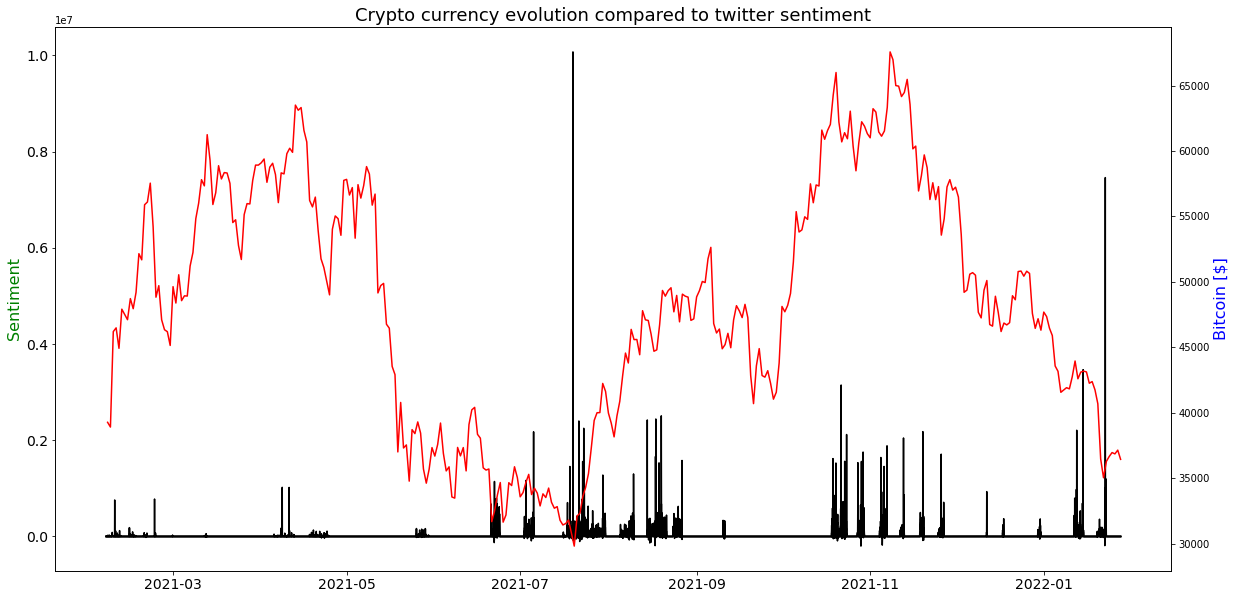

In [17]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Crypto currency evolution compared to twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped.index, tweets_grouped, 'k-')
ax2.plot_date(crypto_usd_grouped.index, crypto_usd_grouped, 'r-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("Bitcoin [$]", color='b', fontsize=16)
plt.show()

## Normalization

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


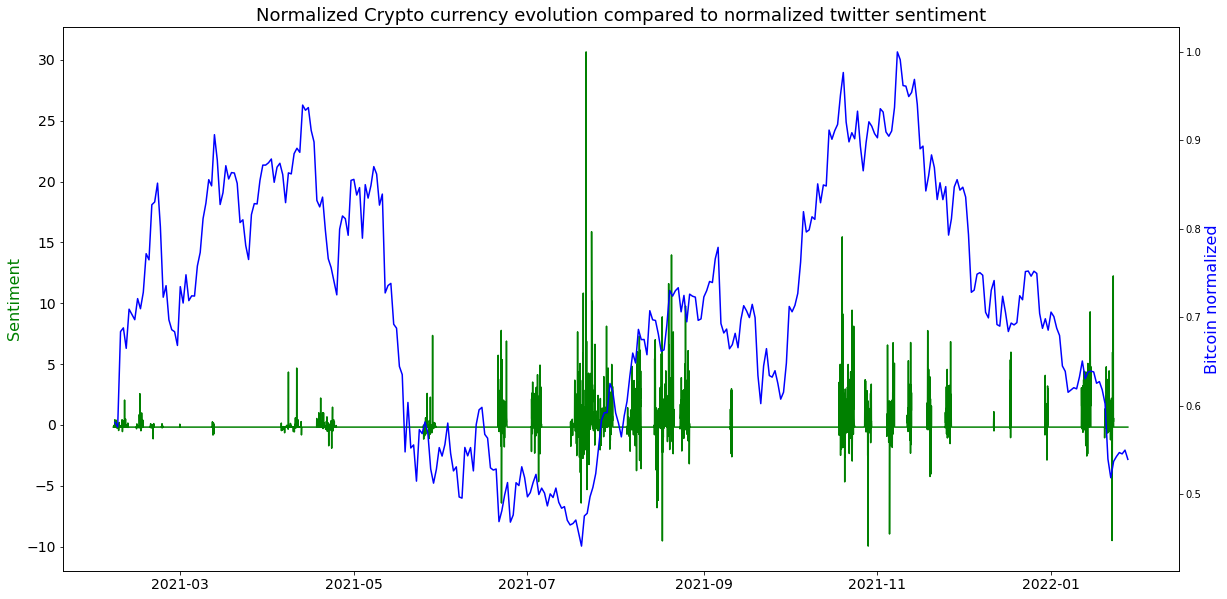

In [18]:
min_max_scaler = preprocessing.StandardScaler()
score_scaled = min_max_scaler.fit_transform(tweets_grouped['score'].values.reshape(-1,1))
tweets_grouped['normalized_score'] = score_scaled
crypto_used_grouped_scaled = crypto_usd_grouped / max(crypto_usd_grouped.max(), abs(crypto_usd_grouped.min()))
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Normalized Crypto currency evolution compared to normalized twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)

ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped.index, tweets_grouped['normalized_score'], 'g-')
ax2.plot_date(crypto_usd_grouped.index, crypto_used_grouped_scaled, 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("Bitcoin normalized", color='b', fontsize=16)
plt.show()

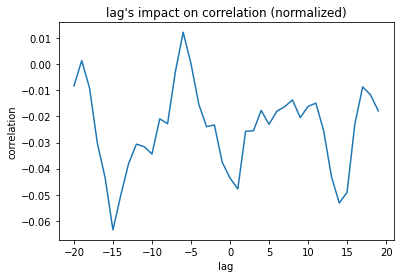

In [19]:
xcov = [crosscorr(tweets_grouped, crypto_usd_grouped, lag=i) for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("lag's impact on correlation (normalized)")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

## Derivative of Crypto price 

In [20]:
# Derivative
tweets_grouped_derivative = pd.Series(np.gradient(tweets_grouped['normalized_score'].values), tweets_grouped.index, name='slope')
crypto_usd_grouped_derivative = pd.Series(np.gradient(crypto_usd_grouped.values), crypto_usd_grouped.index, name='slope')

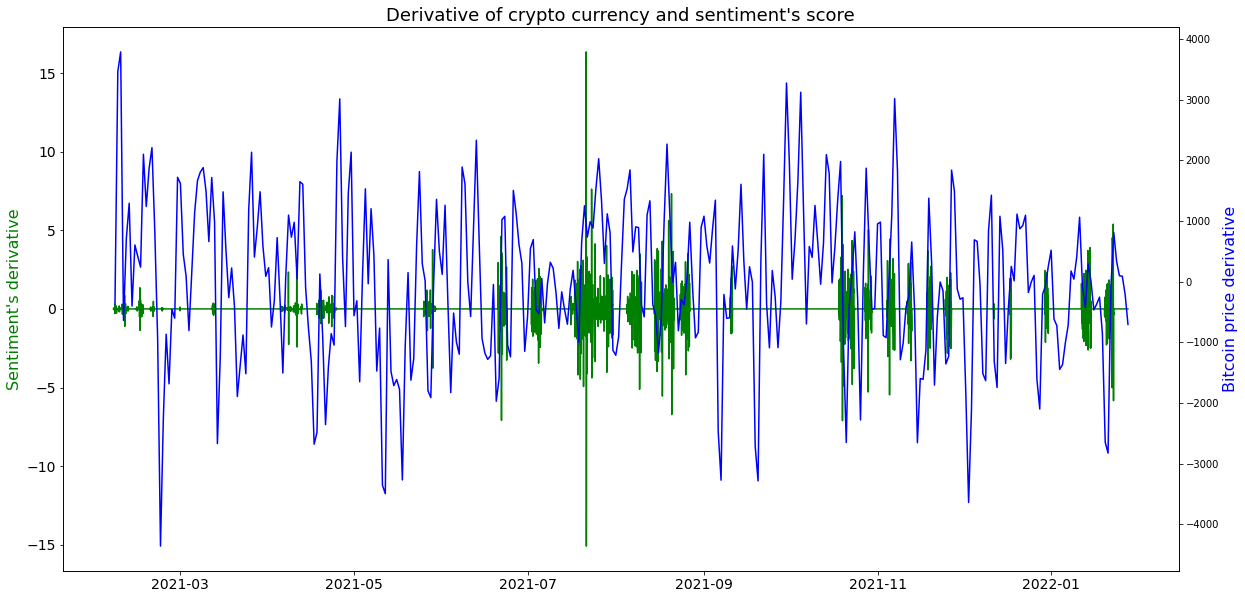

In [21]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Derivative of crypto currency and sentiment's score", fontsize=18)
ax1.tick_params(labelsize=14)

ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped_derivative.index, tweets_grouped_derivative, 'g-')
ax2.plot_date(crypto_usd_grouped_derivative.index, crypto_usd_grouped_derivative, 'b-')

ax1.set_ylabel("Sentiment's derivative", color='g', fontsize=16)
ax2.set_ylabel('Bitcoin price derivative', color='b', fontsize=16)
plt.show()

# Part 2 NLP Modeling 

In [22]:
! pip install textblob 
from textblob import TextBlob

df = df_clean.copy()
df.dropna(subset=['hashtags'], inplace=True)
df = df[['text']] 
df.columns = ['tweets']
df.head()

,tweets
0,"Check it out who followed to in Twitter!\n\n, ..."
1,the strongest bullish signal flashed for Bitco...
2,"The current price of bitcoin is $40,149.00. It..."
3,"Bitcoin going to $64,000 🚀"
4,bitcoinnews 's short-term decline gives us a c...


In [23]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = nltk.corpus.stopwords.words(['english'])

print(stop_words)

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between

In [24]:
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

def cleaning(data):
    #remove urls
    tweet_without_url = re.sub(r'http\S+',' ', data)

    #remove hashtags
    tweet_without_hashtag = re.sub(r'#\w+', ' ', tweet_without_url)

    #3. Remove mentions and characters that not in the English alphabets
    tweet_without_mentions = re.sub(r'@\w+',' ', tweet_without_hashtag)
    precleaned_tweet = re.sub('[^A-Za-z]+', ' ', tweet_without_mentions)

    #2. Tokenize
    tweet_tokens = TweetTokenizer().tokenize(precleaned_tweet)

    #3. Remove Puncs
    tokens_without_punc = [w for w in tweet_tokens if w.isalpha()]

    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #5. lemma
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]

    #6. Joining
    return " ".join(text_cleaned)

In [25]:
df['cleaned_tweets'] = df['tweets'].apply(cleaning)
df['date'] = df_clean['date']
df['date_clean'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
df.drop(columns='date',inplace=True)
df.head()

,tweets,cleaned_tweets,date_clean
0,"Check it out who followed to in Twitter!\n\n, ...",Check followed Twitter many Twitter Score sgm ...,2022-04-19
1,the strongest bullish signal flashed for Bitco...,strongest bullish signal flashed Bitcoin Not t...,2022-03-19
2,"The current price of bitcoin is $40,149.00. It...",The current price bitcoin It increased last ho...,2021-08-06
3,"Bitcoin going to $64,000 🚀",Bitcoin going,2021-10-19
4,bitcoinnews 's short-term decline gives us a c...,bitcoinnews short term decline give u chance l...,2022-03-10


In [26]:
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [27]:
def crypto_price_cate(score):
    if score < 1:
        return 'negative'
    elif score == 1:
        return 'neutral'
    else:
        return 'positive'
def observe_period(period):
    res = crypto_usd_grouped.shift(period)/crypto_usd_grouped
    res = res.apply(crypto_price_cate)
    return res 

time_sentiment = observe_period(7) # compare price ratio in 7 days. price_7_days_later/ price_now 
df['crypto_sentiment'] = df.date_clean.apply(lambda x: time_sentiment[x] if x in time_sentiment else np.nan)

In [28]:
# may takes time 
df['subjectivity'] = df['cleaned_tweets'].apply(getSubjectivity)
df['polarity'] = df['cleaned_tweets'].apply(getPolarity)
df.head()

,tweets,cleaned_tweets,date_clean,crypto_sentiment,subjectivity,polarity
0,"Check it out who followed to in Twitter!\n\n, ...",Check followed Twitter many Twitter Score sgm ...,2022-04-19,NaN,0.500000,0.50
1,the strongest bullish signal flashed for Bitco...,strongest bullish signal flashed Bitcoin Not t...,2022-03-19,NaN,0.545833,0.20
2,"The current price of bitcoin is $40,149.00. It...",The current price bitcoin It increased last ho...,2021-08-06,negative,0.233333,0.00
3,"Bitcoin going to $64,000 🚀",Bitcoin going,2021-10-19,negative,0.000000,0.00
4,bitcoinnews 's short-term decline gives us a c...,bitcoinnews short term decline give u chance l...,2022-03-10,NaN,0.425000,0.15


In [29]:
def getSentiment(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'
df['sentiment'] = df['polarity'].apply(getSentiment)
df['target'] = df['sentiment'] == df['crypto_sentiment']
df.head()
df.to_csv('./df_data.csv')

## Model preparation 

In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Bidirectional, SpatialDropout1D
from tensorflow.keras.models import load_model


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [31]:
df.head()

,tweets,cleaned_tweets,date_clean,crypto_sentiment,subjectivity,polarity,sentiment,target
0,"Check it out who followed to in Twitter!\n\n, ...",Check followed Twitter many Twitter Score sgm ...,2022-04-19,NaN,0.500000,0.50,positive,False
1,the strongest bullish signal flashed for Bitco...,strongest bullish signal flashed Bitcoin Not t...,2022-03-19,NaN,0.545833,0.20,positive,False
2,"The current price of bitcoin is $40,149.00. It...",The current price bitcoin It increased last ho...,2021-08-06,negative,0.233333,0.00,neutral,False
3,"Bitcoin going to $64,000 🚀",Bitcoin going,2021-10-19,negative,0.000000,0.00,neutral,False
4,bitcoinnews 's short-term decline gives us a c...,bitcoinnews short term decline give u chance l...,2022-03-10,NaN,0.425000,0.15,positive,False


In [32]:
X = df['cleaned_tweets']
y = pd.get_dummies(df['sentiment']).values
num_classes = df['sentiment'].nunique()

In [33]:
seed = 38 # fix random seed for reproducibility
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26422,) (6606,) (26422, 3) (6606, 3)


In [34]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [35]:
from tensorflow.keras.preprocessing import sequence
max_words = 30
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)

(26422, 30) (6606, 30)


In [36]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

batch_size = 128
epochs = 10

max_features = 20000
embed_dim = 100

np.random.seed(seed)
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))    
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


User settings:

   KMP_AFFINITY=granularity=fine,noverbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 100)           2000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 30, 32)            9632      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 15, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 15, 32)            3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 32)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 3)                 3

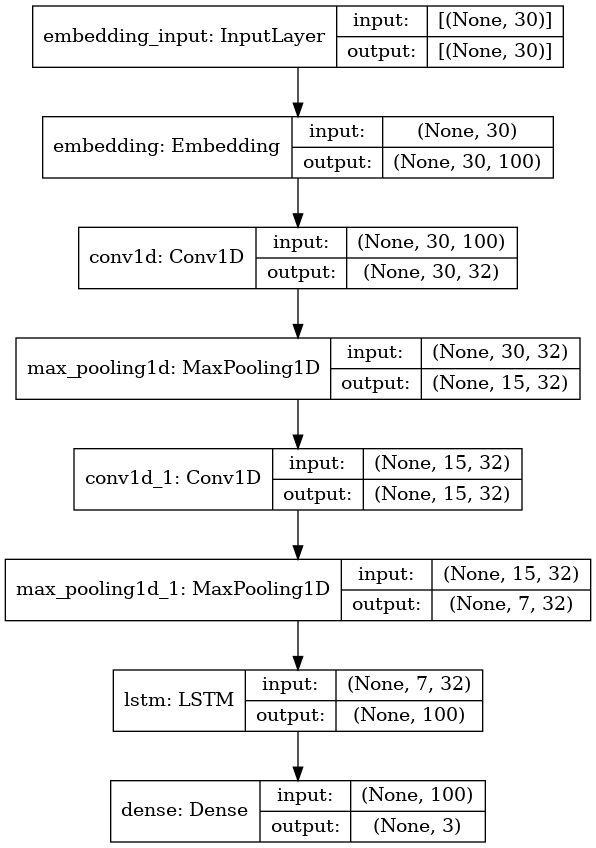

In [37]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [38]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size, verbose=2)

2022-05-30 04:47:03.504276: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
207/207 - 16s - loss: 0.5539 - accuracy: 0.7739 - val_loss: 0.3536 - val_accuracy: 0.8739
Epoch 2/10
207/207 - 11s - loss: 0.1904 - accuracy: 0.9368 - val_loss: 0.2203 - val_accuracy: 0.9354
Epoch 3/10
207/207 - 12s - loss: 0.0679 - accuracy: 0.9803 - val_loss: 0.2110 - val_accuracy: 0.9414
Epoch 4/10
207/207 - 12s - loss: 0.0331 - accuracy: 0.9915 - val_loss: 0.2368 - val_accuracy: 0.9435
Epoch 5/10
207/207 - 11s - loss: 0.0241 - accuracy: 0.9941 - val_loss: 0.2509 - val_accuracy: 0.9398
Epoch 6/10
207/207 - 12s - loss: 0.0166 - accuracy: 0.9960 - val_loss: 0.2440 - val_accuracy: 0.9431
Epoch 7/10
207/207 - 12s - loss: 0.0135 - accuracy: 0.9964 - val_loss: 0.2940 - val_accuracy: 0.9413
Epoch 8/10
207/207 - 12s - loss: 0.0131 - accuracy: 0.9967 - val_loss: 0.2798 - val_accuracy: 0.9449
Epoch 9/10
207/207 - 11s - loss: 0.0116 - accuracy: 0.9969 - val_loss: 0.3022 - val_accuracy: 0.9417
Epoch 10/10
207/207 - 11s - loss: 0.0108 - accuracy: 0.9974 - val_loss: 0.2845 - val_accura

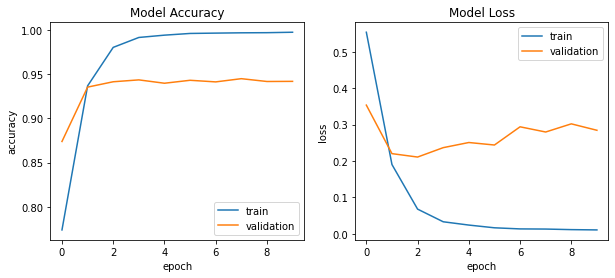

In [39]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

In [40]:
# predict class with test set
y_pred_test =  np.argmax(model.predict(X_test), axis=1)
print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

Accuracy:	94.2%
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       710
           1       0.96      0.95      0.95      2630
           2       0.94      0.97      0.96      3266

    accuracy                           0.94      6606
   macro avg       0.92      0.90      0.91      6606
weighted avg       0.94      0.94      0.94      6606



2    3266
1    2630
0     710
dtype: int64
2    3386
1    2595
0     625
dtype: int64


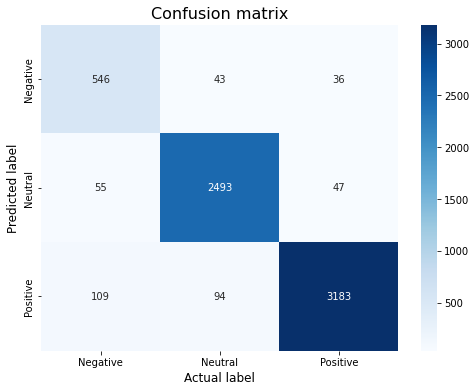

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative','Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(y_pred, axis=1),np.argmax(np.array(y_test),axis=1))
    
    print(pd.Series(np.argmax(np.array(y_test),axis=1)).value_counts())
    print(pd.Series(np.argmax(y_pred, axis=1)).value_counts())
    
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

## Model2 

In [42]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['cleaned_tweets'][0])
X, tokenizer = tokenize_pad_sequences(df['cleaned_tweets'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 Check followed Twitter many Twitter Score sgm NDPCjW BTC crypto via
After Tokenization & Padding 
 [  98 1664  196  208  196 1037    2    3  159    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [43]:
y = pd.get_dummies(df['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set: ', X_train.shape, y_train.shape)
print('Validation Set: ', X_val.shape, y_val.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (19816, 50) (19816, 3)
Validation Set:  (6606, 50) (6606, 3)
Test Set:  (6606, 50) (6606, 3)


In [44]:
import tensorflow.keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import History
from tensorflow.keras import losses

In [46]:
vocab_size = 5000
embedding_size = 32
epochs = 10
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8

In [47]:
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

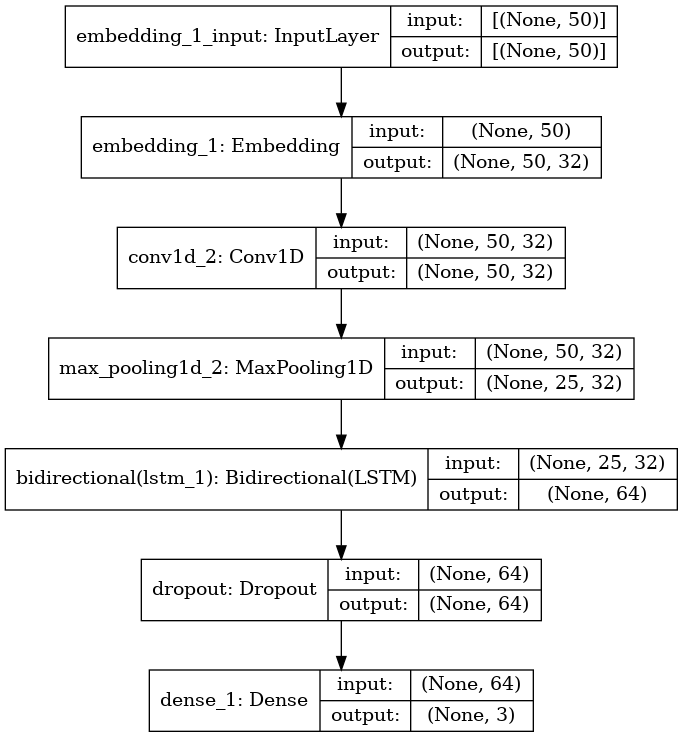

In [48]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [49]:
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', Precision(), Recall()])

In [50]:
history = model.fit(X_train,y_train,validation_data=(X_val, y_val),batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/10
155/155 [==============================] - 14s 60ms/step - loss: 0.9701 - accuracy: 0.4848 - precision: 0.5133 - recall: 0.1191 - val_loss: 0.9472 - val_accuracy: 0.4967 - val_precision: 0.7949 - val_recall: 0.0047
Epoch 2/10
155/155 [==============================] - 9s 55ms/step - loss: 0.9530 - accuracy: 0.4999 - precision: 0.5478 - recall: 0.1951 - val_loss: 0.9399 - val_accuracy: 0.5033 - val_precision: 0.6529 - val_recall: 0.0120
Epoch 3/10
155/155 [==============================] - 8s 54ms/step - loss: 0.9397 - accuracy: 0.5431 - precision: 0.6167 - recall: 0.2409 - val_loss: 0.9178 - val_accuracy: 0.5736 - val_precision: 0.6358 - val_recall: 0.3404
Epoch 4/10
155/155 [==============================] - 8s 52ms/step - loss: 0.9108 - accuracy: 0.5881 - precision: 0.6371 - recall: 0.4074 - val_loss: 0.8921 - val_accuracy: 0.6013 - val_precision: 0.6419 - val_recall: 0.4673
Epoch 5/10
155/155 [==============================] - 8s 52ms/step - loss: 0.8965 - accuracy: 0.596

In [51]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.6105
Precision : 0.6465
Recall    : 0.5286
F1 Score  : 0.5817


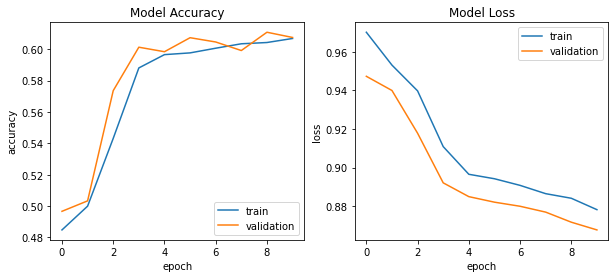

In [52]:
plot_training_hist(history)

2    3283
1    2622
0     701
dtype: int64
2    4192
1    2414
dtype: int64


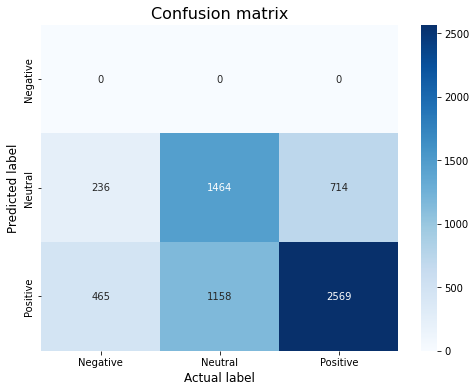

In [53]:
plot_confusion_matrix(model, X_test, y_test)